In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# <span style="color:#ff9999"> John Mayer <span>
    
### A quick analysis of <span style="color:#ff9999">John Mayer<span> <span style="color:black">and his music using<span><span style="color:#6495ed"> Spotify's API using Spotipy <span>

### <span style="color:#a3c1ad">1) Studio Albums<span>
<img src="https://i.scdn.co/image/ab67616d0000b273779063301154e835a91a35e0" alt="image info" width="100" height="200"/><img src="https://i.scdn.co/image/ab67616d0000b273c6bfaf942ed981d5c4c922e4" alt="image info" width="100" height="200"/><img src="https://i.scdn.co/image/ab67616d0000b2738e3ab1cbd76d15dc64450a13" alt="image info" width="100" height="200"/><img src="https://i.scdn.co/image/ab67616d0000b2733c6bbf44de57c6eb51818694" alt="image info" width="100" height="200"/><img src="https://i.scdn.co/image/ab67616d0000b2731e3dbe4453ed61633c472fbe" alt="image info" width="100" height="200"/><img src="https://i.scdn.co/image/ab67616d0000b2737af5fdc5ef048a68db62b85f" alt="image info" width="100" height="200"/><img src="https://i.scdn.co/image/ab67616d0000b2731a4c7c7e6eeaee67c9e8ce71" alt="image info" width="100" height="200"/><img src="https://i.scdn.co/image/ab67616d0000b2738848d57cbfa7751e028f4dc9" alt="image info" width="100" height="200"/><img src="https://i.scdn.co/image/ab67616d0000b27313b8932e94c65ca93bd9b0a7" alt="image info" width="100" height="200"/>

### <span style="color:#a3c1ad">2) Live Albums<span>
<img src="https://i.scdn.co/image/ab67616d0000b2735b9c332f9f76cabc137e400f" alt="image info" width="100" height="200"/><img src="https://i.scdn.co/image/ab67616d0000b2734e11d5914304089ea0581a5d" alt="image info" width="100" height="200"/><img src="https://i.scdn.co/image/ab67616d0000b273cade4f773a0452b80a9740a3" alt="image info" width="100" height="200"/><img src="https://i.scdn.co/image/ab67616d0000b2739fd5ead06cda1f0f0caa7e6d" alt="image info" width="100" height="200"/><img src="https://i.scdn.co/image/ab67616d0000b2730368118d8a71c60e37919c89" alt="image info" width="100" height="200"/><img src="https://i.scdn.co/image/ab67616d0000b273f248fce7e20ca4cf2d39eed6" alt="image info" width="100" height="200"/><img src="https://i.scdn.co/image/ab67616d0000b273e76e0e74804c10bafcdf4222" alt="image info" width="100" height="200"/><img src="https://i.scdn.co/image/ab67616d0000b273999ab84f7ab80c0d567f5296" alt="image info" width="100" height="200"/>

-------------------
-------------------

In [2]:
# song audio features
saf = pd.read_csv('song_data_output/song_audio_features_combined.csv',index_col=0).reset_index(drop=True)

#song info
si = pd.read_csv('song_data_output/song_info_combined.csv',index_col=0)

# album info
ai = pd.read_csv('song_data_output/album_info.csv',index_col=0)

# Link songs to their albums and create a name for the data that makes things clear
songAlbum = pd.merge(ai,si,left_on='name',right_on='album_name',suffixes=('_ai','_si'))

# Link audio features to the songs
## important to note that likely any columns that share the same name will be related to songs and not albums
songDetailAlbum = pd.merge(songAlbum,saf,left_on='id_si',right_on='id',suffixes=('songAlbum','_saf'))


#### Ok! Great :)
#### We have the bulk of wrangling and cleaning done at this point. Let's do some exploration using some spotify song metrics and check for biases.
#### Straight away I can see Live albums in the data. By eye, they have higher 'energy', 'liveness' and less 'danceability'. It's possible danceability correlates to studio production. 
#### I have no quick way of grouping live albums from studio albums so I need to make one. Nothing fancy I can do here, I just need to map it manually.

--------------

Text(0.5, 1.0, "\n\nWow! What a cool result :)\nLiveness is bimodal which is great. Nice indicator produced by Spotify.\nLive Albums have higher 'liveness' than non-live albums. There are some exceptions!")

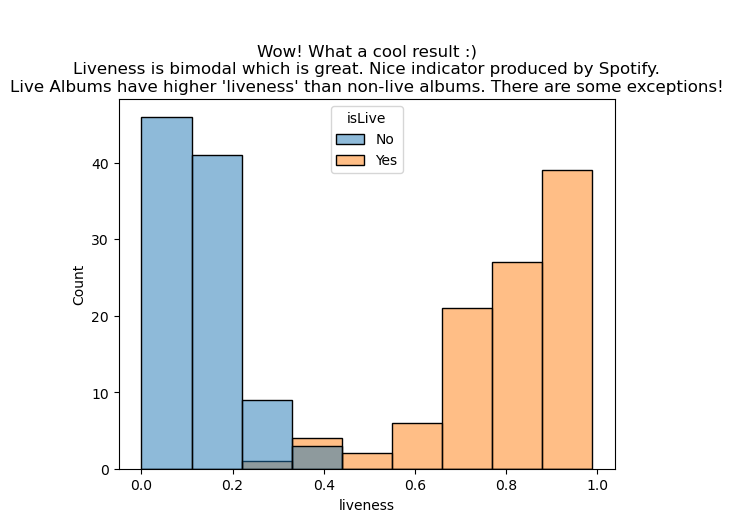

In [3]:
songDetailAlbum.groupby(['album_name'])[['liveness','energy','danceability']].mean().sort_values(['liveness','energy','danceability'],ascending = [False,False,False])

# Remember ids are better than string names e.g. '2JmfwvRDitJlTUoLCkp61z' is preferable over 'Sob Rock'

listLiveAlbums = ['1hC2L9ZBeCSUsh6w3xzqN7',
                  '4ZxNekqkeVlCYcNdD0mnD7',
                  '4Dgxy95K9BWkDUvQPTaYBb',
                  '4rBHg7R3tDXJirsOrp4vG4',
                  '5gsTckUr9I4z7uFHMheffb',
                  '31Q7DQ751hbCO98r1ODhGt',
                  '0u3x6X6FRE23fJEhPJoo6Q',
                  '1QRIX6BuSGegYwiAZOv4R5']

# Create a zero-filled field to start to identify Live albums 
songDetailAlbum['isLive'] = 'No'
# Simple conditional logic using Pandas - If album id is in the list of live albums tag the album with 1  
songDetailAlbum.loc[songDetailAlbum['id_ai'].isin(listLiveAlbums),'isLive'] = 'Yes'

# Let's check Spotify 'liveness' record to see how the tag looks 
songDetailAlbum.groupby(['album_name','isLive'])[['energy','liveness']].mean().sort_values(['liveness','energy'],ascending = [False,False])


sns.histplot(songDetailAlbum,x='liveness',hue='isLive')

songDetailAlbum.groupby(['album_name','isLive'])[['energy','liveness']].mean().sort_values(['isLive'])
plt.title("\n\nWow! What a cool result :)\nLiveness is bimodal which is great. Nice indicator produced by Spotify.\nLive Albums have higher 'liveness' than non-live albums. There are some exceptions!")

In [ ]:
songDetailAlbumLiveAlbums = songDetailAlbum.loc[songDetailAlbum['isLive']=='No']

isLive = No


Text(0.5, 1.2, "\n\nA simple correlation plot across a number of audio features. I think\nvalence is a very interesting concept. The idea of sad and\nhappy sounding sounds intrigues me there are so many artists who play\nsad music but sing uplifting lyrics (the intro to 'Welcome to the\nBlack Parade' by My Chemical Romance is a good example') and artists who\nplay happy music but sing about often heavy subject matter (e.g The Smiths).\nDanceability, energy and loudness correlate positively with valence")

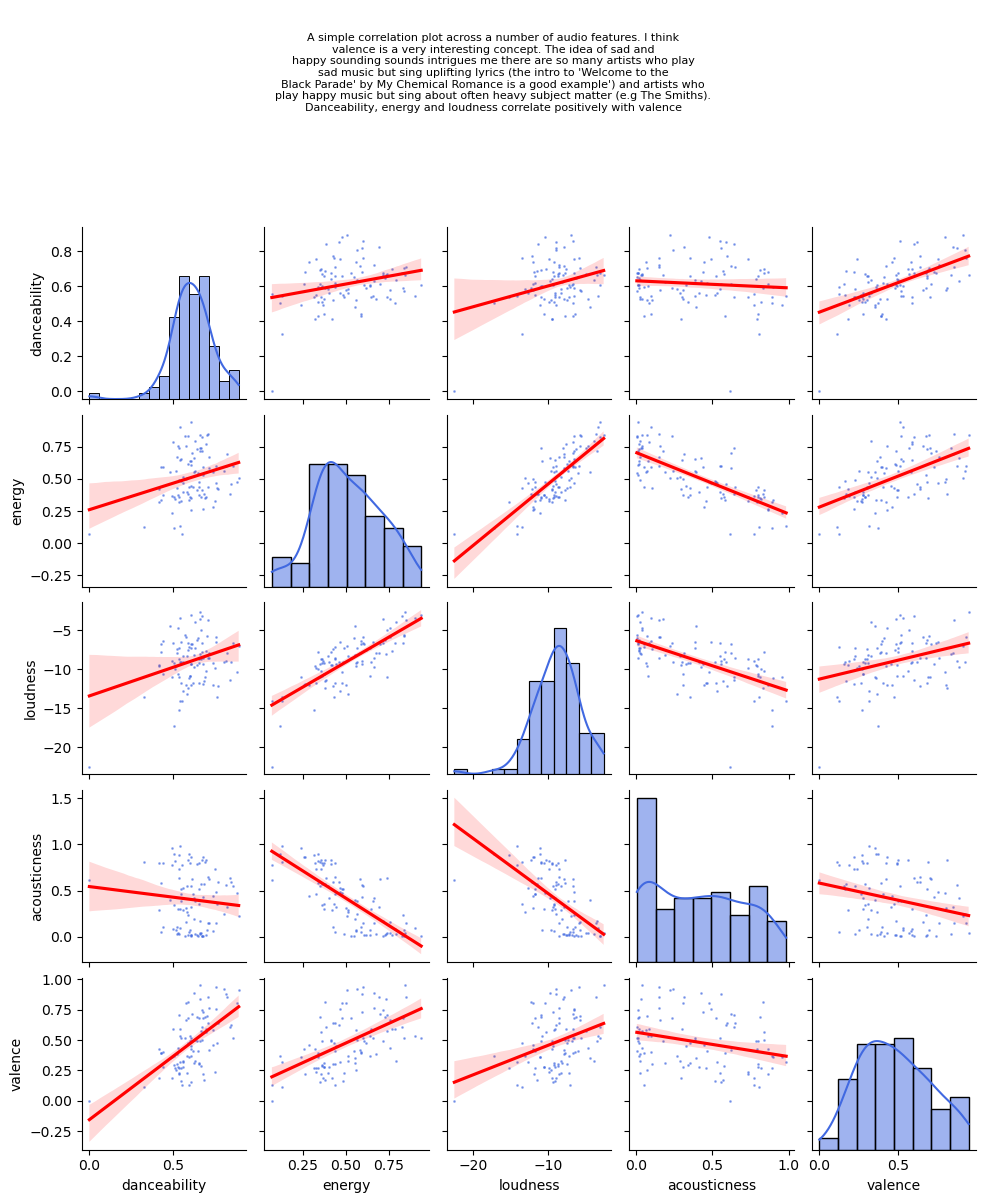

In [4]:
metrics= ['album_name','name_si','danceability','energy', 'loudness', 'acousticness','valence']

print('isLive = No',)

p = sns.pairplot(songDetailAlbum.loc[songDetailAlbum['isLive']=='No'][metrics],
             kind='reg',markers='o',plot_kws={'line_kws':{'color':'red'},'scatter_kws':{'alpha':0.5,'s':1,'color':'#4169e1'}},diag_kws= {'color': '#4169e1','kde':'True'},height=2)

p.fig.suptitle("\n\nA simple correlation plot across a number of audio features. I think\nvalence is a very interesting concept. The idea of sad and\nhappy sounding sounds intrigues me there are so many artists who play\nsad music but sing uplifting lyrics (the intro to 'Welcome to the\nBlack Parade' by My Chemical Romance is a good example') and artists who\nplay happy music but sing about often heavy subject matter (e.g The Smiths).\nDanceability, energy and loudness correlate positively with valence",
               y=1.2,size=8) 

live = No


Text(0.5, 1.2, "\n\nInstead of analyzing John Mayer's catalogue as if it is one big album essentially,\nlet's analyze the albums as separate cohorts. Albums have themes and visions\nwhich should be considered. For example, you can see his first album Room\nFor Squares and how it stands out from the rest.The quality\nof breakthrough albums for many artists tends to be something special.In\nthis case Room For Squares is born from a guitar player who\npracticed in his bedroom on his own which is reflected in its strong acoustic sound")

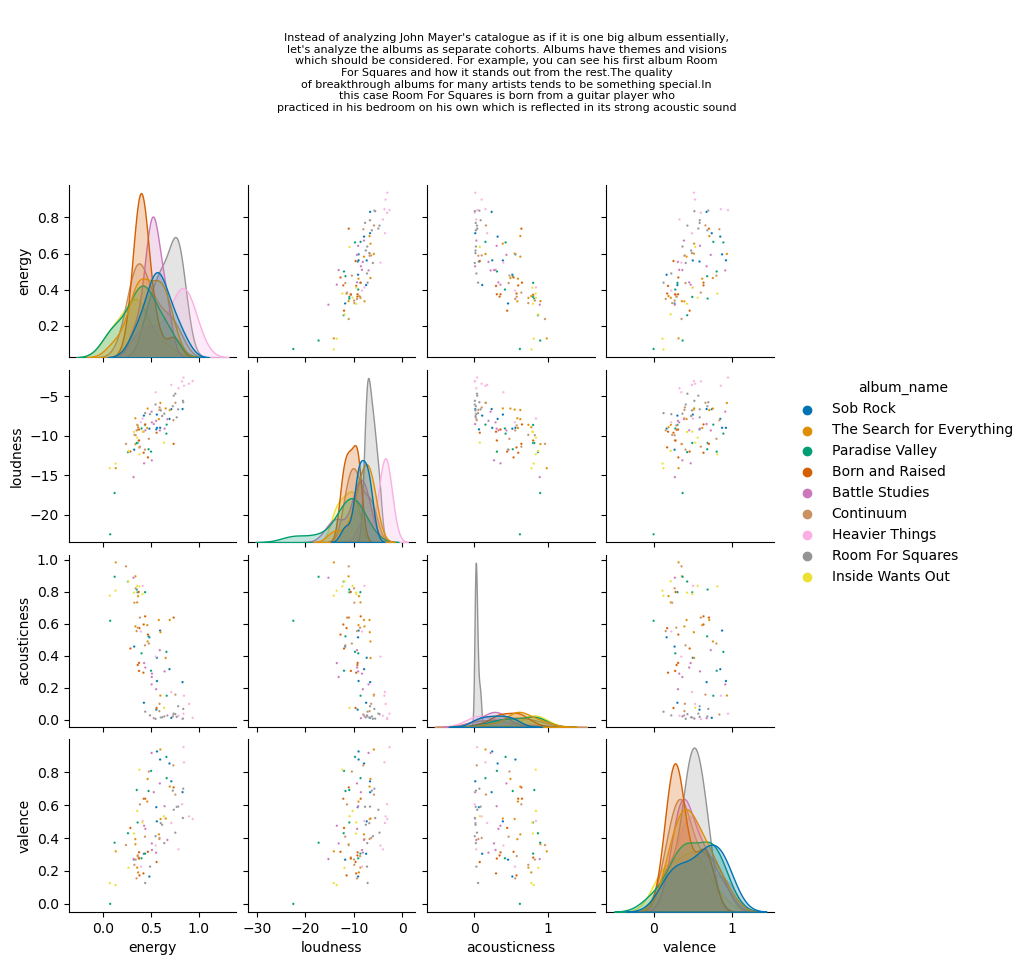

In [5]:
metrics= ['album_name','name_si','energy','loudness', 'acousticness','valence']

print('live = No')
p = sns.pairplot(songDetailAlbum.loc[songDetailAlbum['isLive']=='No'][metrics],hue='album_name',markers='o',height=2,palette='colorblind',plot_kws={'s':3})

p.fig.suptitle("\n\nInstead of analyzing John Mayer's catalogue as if it is one big album essentially,\nlet's analyze the albums as separate cohorts. Albums have themes and visions\nwhich should be considered. For example, you can see his first album Room\nFor Squares and how it stands out from the rest.The quality\nof breakthrough albums for many artists tends to be something special.In\nthis case Room For Squares is born from a guitar player who\npracticed in his bedroom on his own which is reflected in its strong acoustic sound",
               y=1.2,size=8)                                                                                                                                                                                                                                                                                                                                                                                                                        